1. Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
df = pd.read_csv("/content/weatherHistory.csv")


In [ ]:
df

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016,9,9,17
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016,9,9,18
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016,9,9,19
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016,9,9,20


**Data Cleaning**

In [ ]:
df= df.drop(columns=[ 'Precip Type', 'Daily Summary', 'Summary', 'Loud Cover'])

In [ ]:
df.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

2. Data Processing

In [ ]:
print(df.isnull().sum())


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
df = df.dropna()
print(df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
print("Dataset shape:", df.shape)
print("Data types:")
print(df.dtypes)

Dataset shape: (95936, 12)
Data types:
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour


In [ ]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month,Day,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,...,False,True,False,False,False,False,False,False,False,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,...,False,True,False,False,False,False,False,False,False,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,...,False,False,False,False,False,False,False,False,False,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,...,False,True,False,False,False,False,False,False,False,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

**Data analysis**


Selecting Features

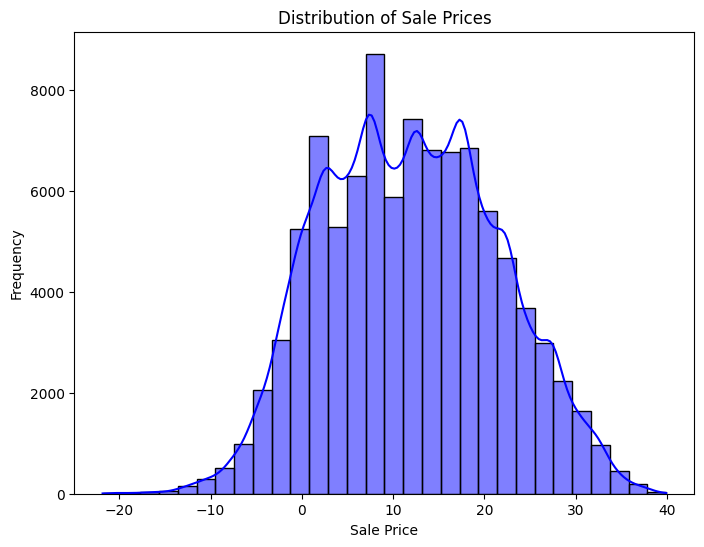

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature (C)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

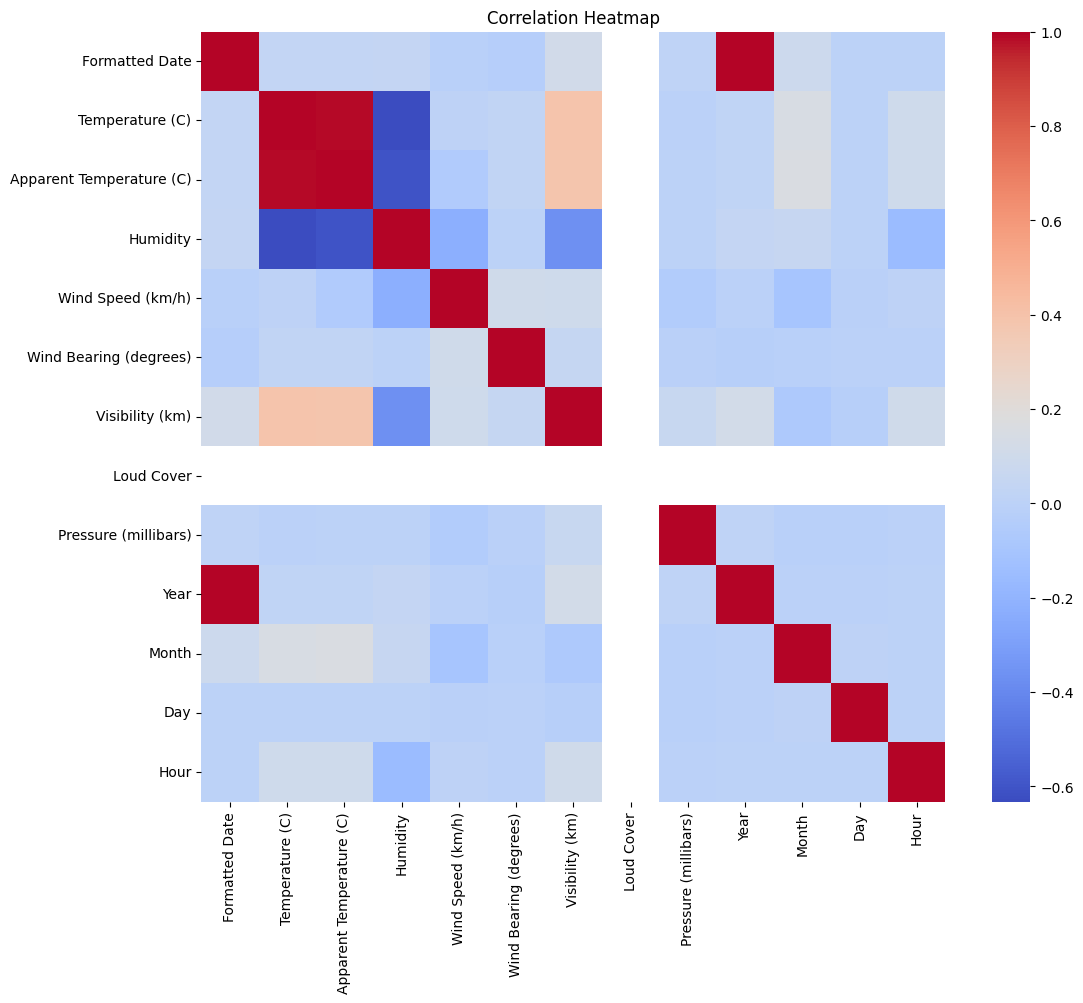

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
correlation_with_target = df.corr()['Temperature (C)'].sort_values(ascending=False)
print(correlation_with_target)

Temperature (C)             1.000000
Apparent Temperature (C)    0.992637
Visibility (km)             0.393719
Month                       0.150479
Hour                        0.099310
Formatted Date              0.032772
Wind Bearing (degrees)      0.029937
Year                        0.019392
Wind Speed (km/h)           0.008304
Day                        -0.000501
Pressure (millibars)       -0.005253
Humidity                   -0.632148
Loud Cover                       NaN
Name: Temperature (C), dtype: float64


In [ ]:
selected_features = correlation_with_target[correlation_with_target.abs() > 0.15].index.tolist()
selected_features.remove('Temperature (C)')  # Exclude the target variable
print("Selected Features:", selected_features)

Selected Features: ['Apparent Temperature (C)', 'Visibility (km)', 'Month', 'Humidity']


#*Selected Features: ['Apparent Temperature (C)', 'Visibility (km)', 'Month', 'Humidity']*

# **Now that we have an idea about the possible features for our model, I am going to test each feature individually before making multiple feature models. Starting with Month Feature.**

#Note: I won't include Apparent Temperature (C) column in the analysis because it is already a prediction column, and it has almost the same values as the Actual Temperature (C) column

**Starting with the Month feature**

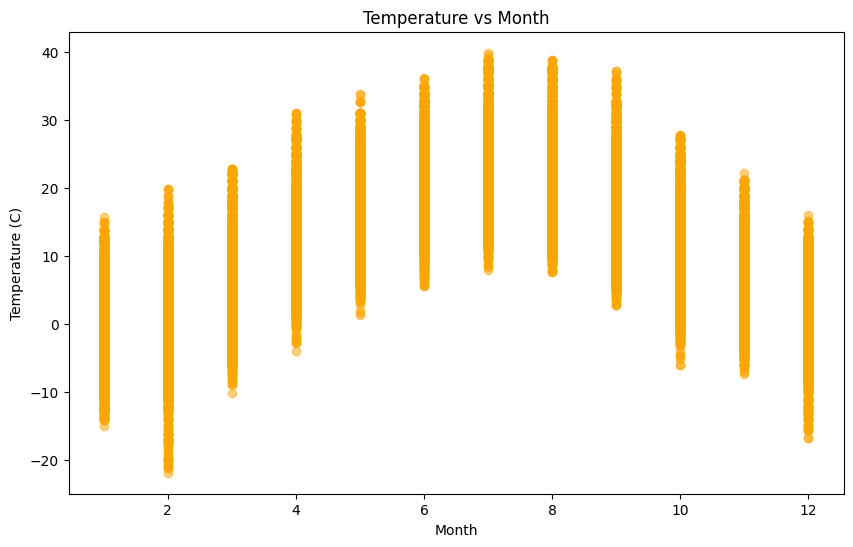

In [ ]:
#select the features
X= df["Month"]
Y=df["Temperature (C)"]

#visualize the scatter plot of X and Y
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='orange', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Month')
plt.show()

**Before performing any tests, it looks like the Month is actually a significant independent variable, but not with a linear pattern, i believe it is either quadratic or sinusoide relationship. To identify the actual relationship we should look at a bigger scale of time.
I will first perform regular month variable analysis so i can compare it after i transform it to a sinusoide variable**


In [ ]:
#Split the data into training set and test set
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=42)

# Reshape X_train to be a 2D array
X_train = X_train.values.reshape(-1, 1)  # -1 means infer the number of rows

#Train the linear regression model to fit our training features
model= LinearRegression()
model.fit(X_train, Y_train)

# Reshape X_test to be a 2D array for predictions
X_test = X_test.values.reshape(-1, 1)

#Make prediction on tarining set and test set
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [ ]:
# Add a constant term to the predictor
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
sm_model = sm.OLS(Y_train, X_train_sm).fit()

# Print the summary
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1777.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:35:21   Log-Likelihood:            -2.8142e+05
No. Observations:               76748   AIC:                         5.628e+05
Df Residuals:                   76746   BIC:                         5.629e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2305      0.073    126.472      0.0

In [ ]:
#Evaluate the model
train_mse= mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_r2= r2_score(Y_train, Y_pred_train)
test_r2= r2_score(Y_test, Y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

Training MSE: 89.62545504407095
Test MSE: 89.11215651347145
Training R2: 0.022624155255722478
Test R2: 0.022704110284056278


Training and Test R² are close but very low => It is better to transform the variable

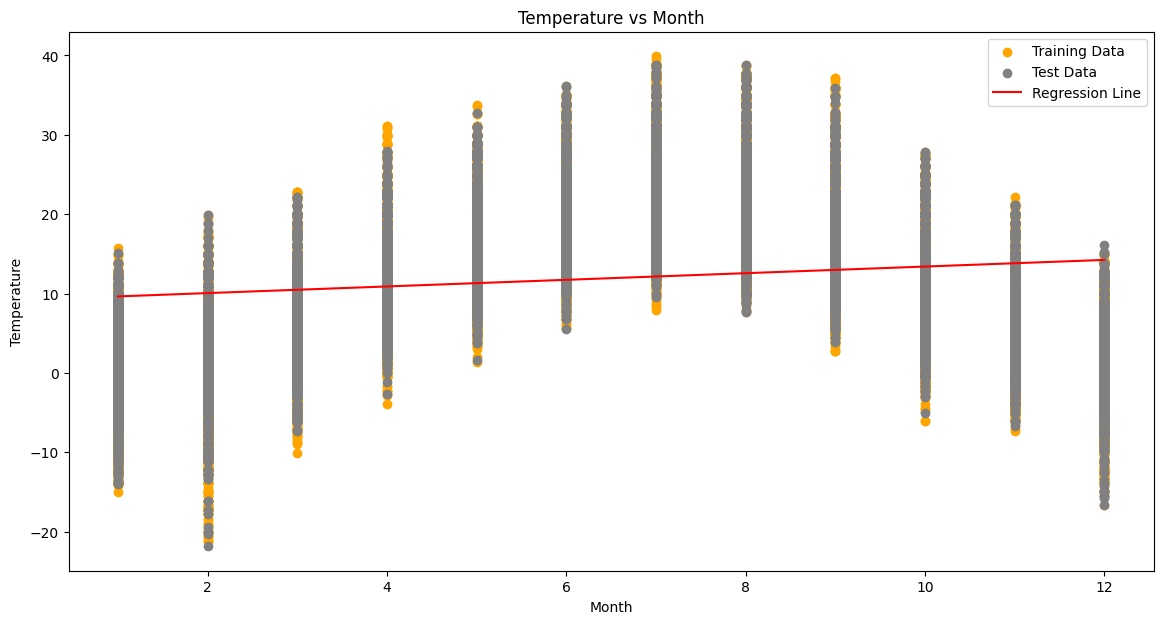

In [ ]:
#Plot the results
plt.figure(figsize=(14, 7))

# Scatter plot of the training data
plt.scatter(X_train, Y_train, color='orange', label='Training Data')

# Scatter plot of the test data
plt.scatter(X_test, Y_test, color='gray', label='Test Data')

# Plot regression line
# Use the original df DataFrame to get the min and max of 'bmi'
X_range = np.linspace(df['Month'].min(), df['Month'].max()).reshape(-1, 1)
y_range_pred = model.predict(X_range)
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Temperature vs Month')
plt.legend()
plt.show()

**R²<0.02 => very weak variable**

**We can already see that the regression is low (0.02) and the pattern doesn't fit with the line, so i will perform the bigger scale of time analysis to look for another pattern**

Looking at the bigger scale of time (sinusoide relationship test)

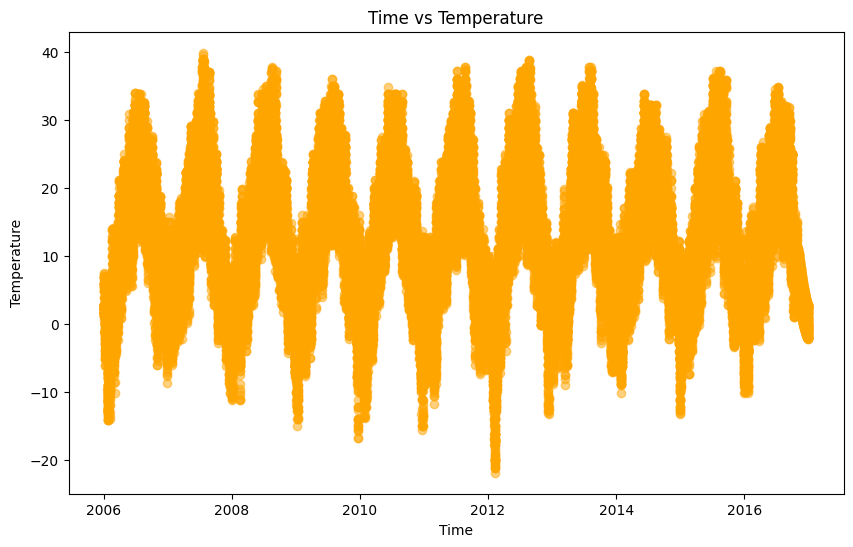

In [ ]:
#select the features
X= df["Formatted Date"]
Y=df["Temperature (C)"]

#visualize the scatter plot of X and Y
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='orange', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Time vs Temperature')
plt.show()

# **We can clearly see that the month feature has a **

In [ ]:
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

Train R²: 0.6774
Test R²: 0.6738
Train RMSE: 5.4389
Test RMSE: 5.4534


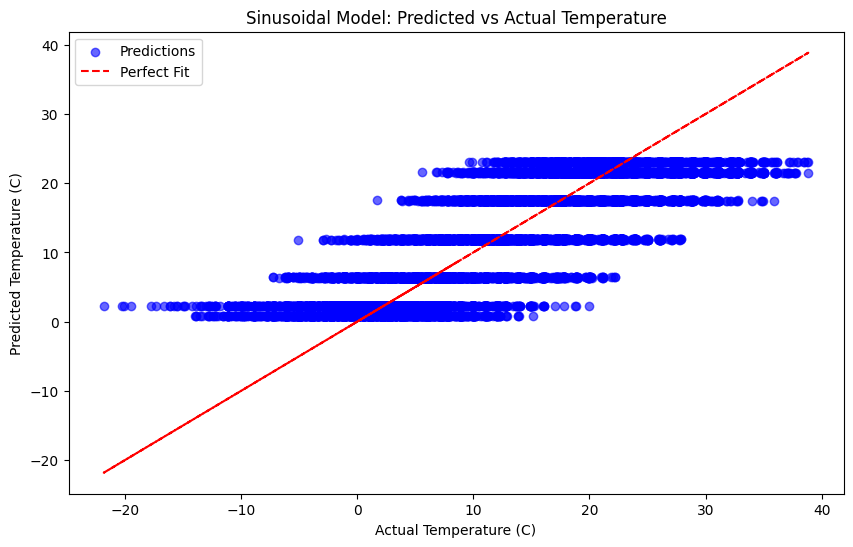

In [ ]:
X = df[['Month_sin', 'Month_cos']]
y = df['Temperature (C)']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model evaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


# Print evaluation metrics
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

# Scatter plot: Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color="blue", label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Sinusoidal Model: Predicted vs Actual Temperature")
plt.legend()
plt.show()

**The R² shifted from 0.02 to 0.67 after the transformation to a sinusoide variable + The model fits the data points better than the first one => Sinusoide relationship confirmed.**

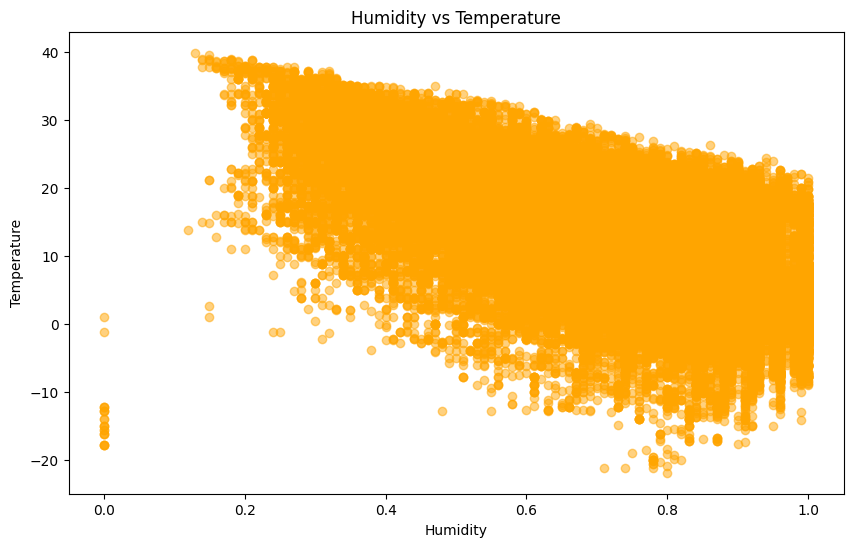

In [ ]:
#select the features
X= df["Humidity"]
Y=df["Temperature (C)"]

#visualize the scatter plot of X and Y
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='orange', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature')
plt.show()

In [ ]:
#Split the data into training set and test set
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=42)

# Reshape X_train to be a 2D array
X_train = X_train.values.reshape(-1, 1)  # -1 means infer the number of rows

#Train the linear regression model to fit our training features
model= LinearRegression()
model.fit(X_train, Y_train)

# Reshape X_test to be a 2D array for predictions
X_test = X_test.values.reshape(-1, 1)

#Make prediction on tarining set and test set
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [ ]:
# Add a constant term to the predictor
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
sm_model = sm.OLS(Y_train, X_train_sm).fit()

# Print the summary
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 5.123e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:37:38   Log-Likelihood:            -2.6267e+05
No. Observations:               76748   AIC:                         5.253e+05
Df Residuals:                   76746   BIC:                         5.254e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6994      0.104    333.592      0.0

In [ ]:
#Evaluate the model
train_mse= mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_r2= r2_score(Y_train, Y_pred_train)
test_r2= r2_score(Y_test, Y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

Training MSE: 54.99110249698873
Test MSE: 55.00538824207769
Training R2: 0.4003157336274069
Test R2: 0.39675413608596


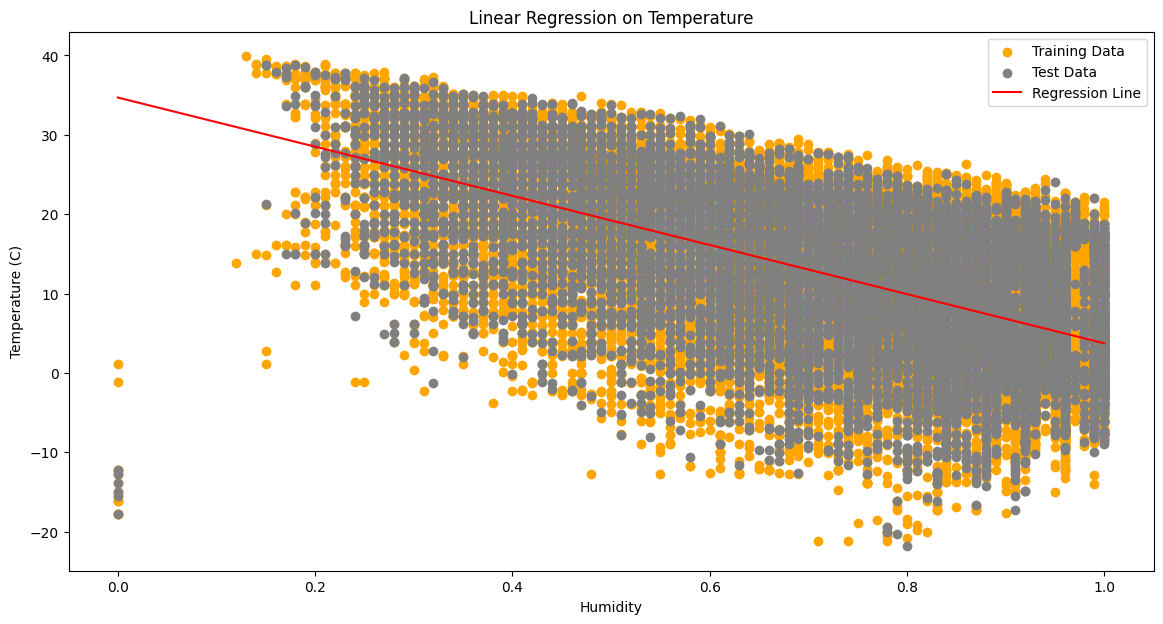

In [ ]:
#Plot the results
plt.figure(figsize=(14, 7))

# Scatter plot of the training data
plt.scatter(X_train, Y_train, color='orange', label='Training Data')

# Scatter plot of the test data
plt.scatter(X_test, Y_test, color='gray', label='Test Data')

# Plot regression line
# Use the original df DataFrame to get the min and max of 'bmi'
X_range = np.linspace(df['Humidity'].min(), df['Humidity'].max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')

plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Linear Regression on Temperature')
plt.legend()
plt.show()

Linear relationship confirmed

- Visibilty variable:

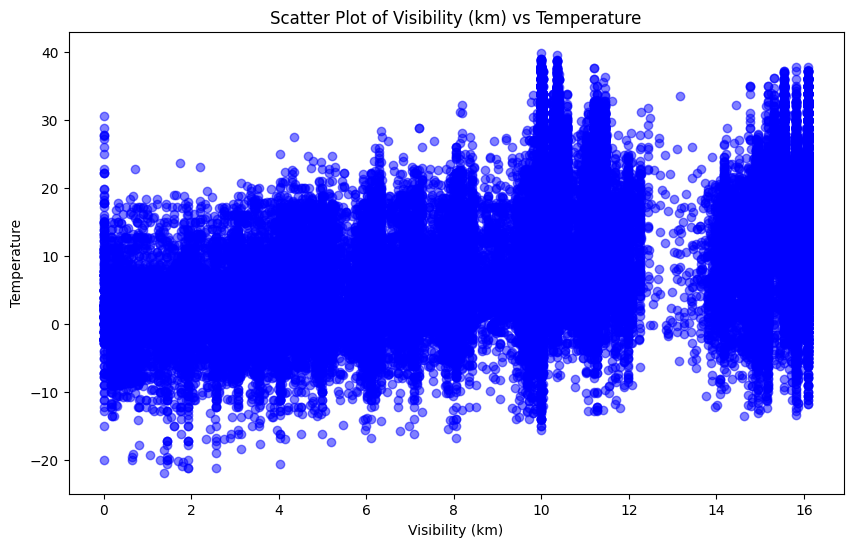

In [ ]:
#select the features
X= df["Visibility (km)"]
Y=df["Temperature (C)"]

#visualize the scatter plot of X and Y
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.5)
plt.xlabel('Visibility (km)')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Visibility (km) vs Temperature')
plt.show()

In [ ]:
#Split the data into training set and test set
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=42)

# Reshape X_train to be a 2D array
X_train = X_train.values.reshape(-1, 1)  # -1 means infer the number of rows

#Train the linear regression model to fit our training features
model= LinearRegression()
model.fit(X_train, Y_train)

# Reshape X_test to be a 2D array for predictions
X_test = X_test.values.reshape(-1, 1)

#Make prediction on tarining set and test set
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [ ]:
import statsmodels.api as sm

# Add a constant term to the predictor
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
sm_model = sm.OLS(Y_train, X_train_sm).fit()

# Print the summary
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                 1.410e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:35:37   Log-Likelihood:            -2.7582e+05
No. Observations:               76748   AIC:                         5.517e+05
Df Residuals:                   76746   BIC:                         5.517e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6040      0.085     30.679      0.0

Simple Linear Model with Visibility:
  Y=2.604+0.9029X

**Evaluating the model:**

In [ ]:
train_mse= mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_r2= r2_score(Y_train, Y_pred_train)
test_r2= r2_score(Y_test, Y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

Training MSE: 77.47130554164752
Test MSE: 77.10621674791071
Training R2: 0.1551665466024451
Test R2: 0.1543736382601404


This model explains 15.51% of the variance of the training data and 15.43% in the test data.
The explained variance has a very small difference between the test and training data using this model. Therefore, this model is reliable on predicting temperature.

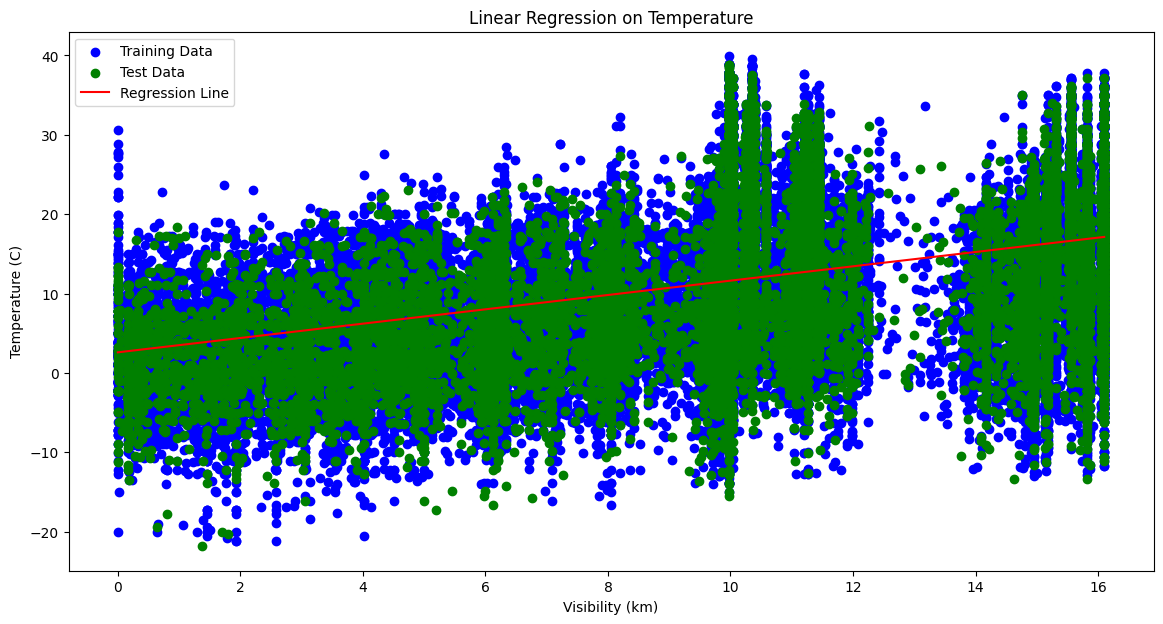

In [ ]:
#Plot the results
plt.figure(figsize=(14, 7))

# Scatter plot of the training data
plt.scatter(X_train, Y_train, color='blue', label='Training Data')

# Scatter plot of the test data
plt.scatter(X_test, Y_test, color='green', label='Test Data')

# Plot regression line
# Use the original df DataFrame to get the min and max of 'bmi'
X_range = np.linspace(df['Visibility (km)'].min(), df['Visibility (km)'].max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')

plt.xlabel('Visibility (km)')
plt.ylabel('Temperature (C)')
plt.title('Linear Regression on Temperature')
plt.legend()
plt.show()

**Regression Analysis**

In [ ]:
def perform_regression(df):
    """Performs linear regression using humidity to predict temperature."""
    X = df[['Humidity']]
    Y = df['Temperature (C)']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    # Statsmodels Regression
    X_train_sm = sm.add_constant(X_train)
    sm_model = sm.OLS(Y_train, X_train_sm).fit()
    print(sm_model.summary())

    # Model Evaluation
    print(f'Training MSE: {mean_squared_error(Y_train, Y_pred_train)}')
    print(f'Test MSE: {mean_squared_error(Y_test, Y_pred_test)}')
    print(f'Training R2: {r2_score(Y_train, Y_pred_train)}')
    print(f'Test R2: {r2_score(Y_test, Y_pred_test)}')

    # Plot Regression Line
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, Y_train, color='blue', label='Training Data')
    plt.scatter(X_test, Y_test, color='green', label='Test Data')
    X_range = np.linspace(df['Humidity'].min(), df['Humidity'].max(), 100).reshape(-1, 1)
    plt.plot(X_range, model.predict(X_range), color='red', label='Regression Line')
    plt.xlabel('Humidity')
    plt.ylabel('Temperature (C)')
    plt.title('Linear Regression: Humidity vs Temperature')
    plt.legend()
    plt.show()


**Multiple regression:**

We will use **Exhaustive Search** in this assignment to find the best multiple regression model.
- Trial 1:

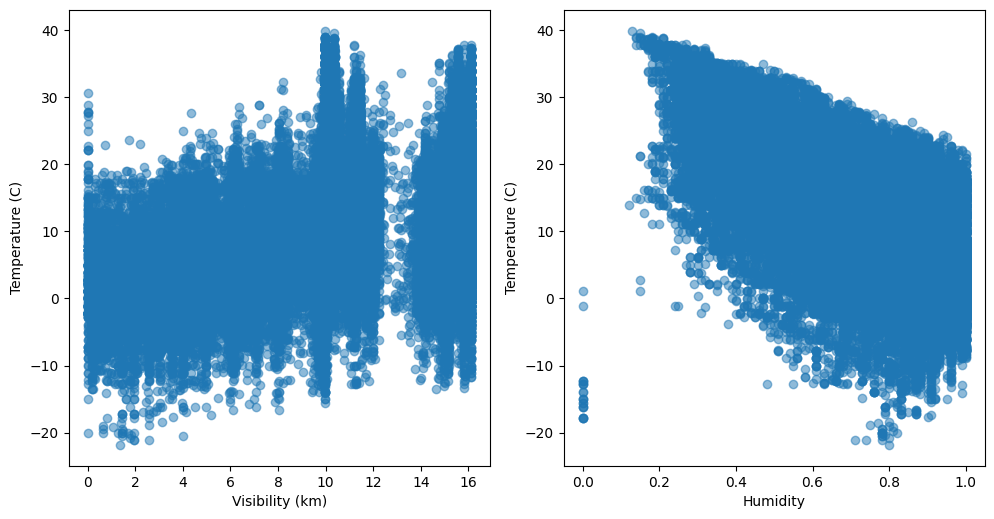

Training MSE: 52.28
Test MSE: 52.36
Training R²: 0.430
Test R²: 0.426


In [ ]:
numerical_features = ['Visibility (km)', 'Humidity']
X = df[numerical_features]
y = df['Temperature (C)']

# Visualize relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R²: {train_r2:.3f}')
print(f'Test R²: {test_r2:.3f}')



Trial #2: Humidity + Month Variables

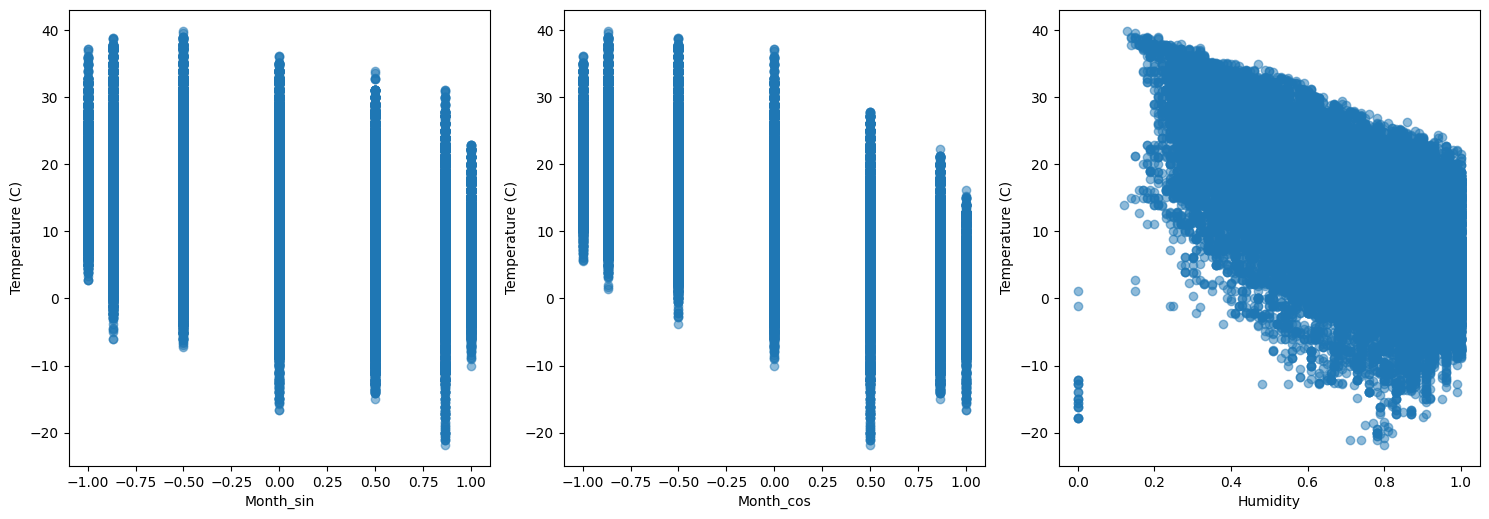

Training MSE: 17.53
Test MSE: 18.02
Training R²: 0.809
Test R²: 0.802
                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.082e+05
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:14:12   Log-Likelihood:            -2.1880e+05
No. Observations:               76748   AIC:                         4.376e+05
Df Residuals:                   76744   BIC:                         4.376e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

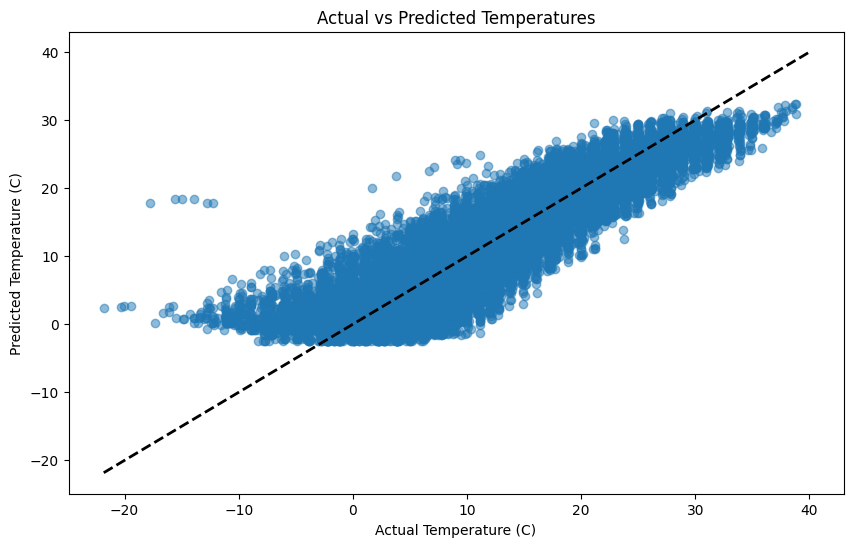

In [ ]:
numerical_features = ['Month_sin', 'Month_cos', 'Humidity']
X = df[numerical_features]
y = df['Temperature (C)']

# Visualize relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R²: {train_r2:.3f}')
print(f'Test R²: {test_r2:.3f}')

# Statistical summary
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperatures')
plt.show()

Trial #3: Visibility + Month Variables:

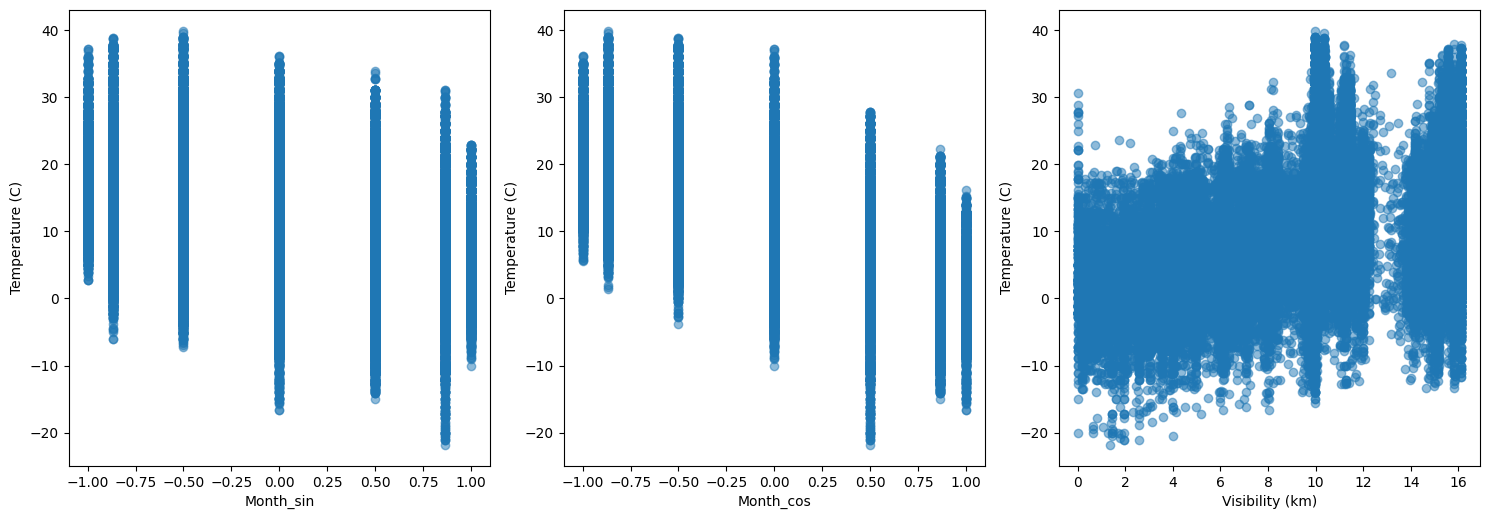

Training MSE: 29.17
Test MSE: 29.38
Training R²: 0.682
Test R²: 0.678
                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                 5.484e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:15:53   Log-Likelihood:            -2.3834e+05
No. Observations:               76748   AIC:                         4.767e+05
Df Residuals:                   76744   BIC:                         4.767e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

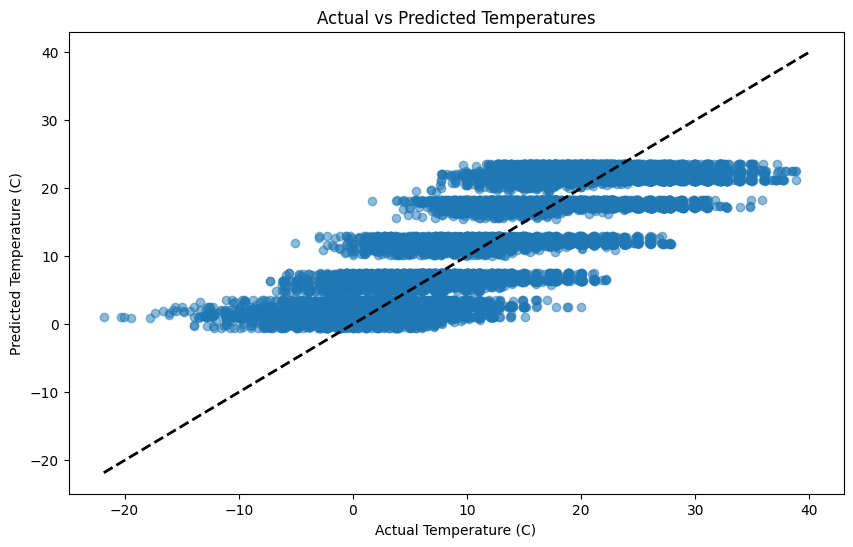

In [ ]:
numerical_features = ['Month_sin', 'Month_cos', 'Visibility (km)']
X = df[numerical_features]
y = df['Temperature (C)']

# Visualize relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R²: {train_r2:.3f}')
print(f'Test R²: {test_r2:.3f}')

# Statistical summary
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperatures')
plt.show()

Trial #4: Visibility + Humidity + Month Sinusoide variables

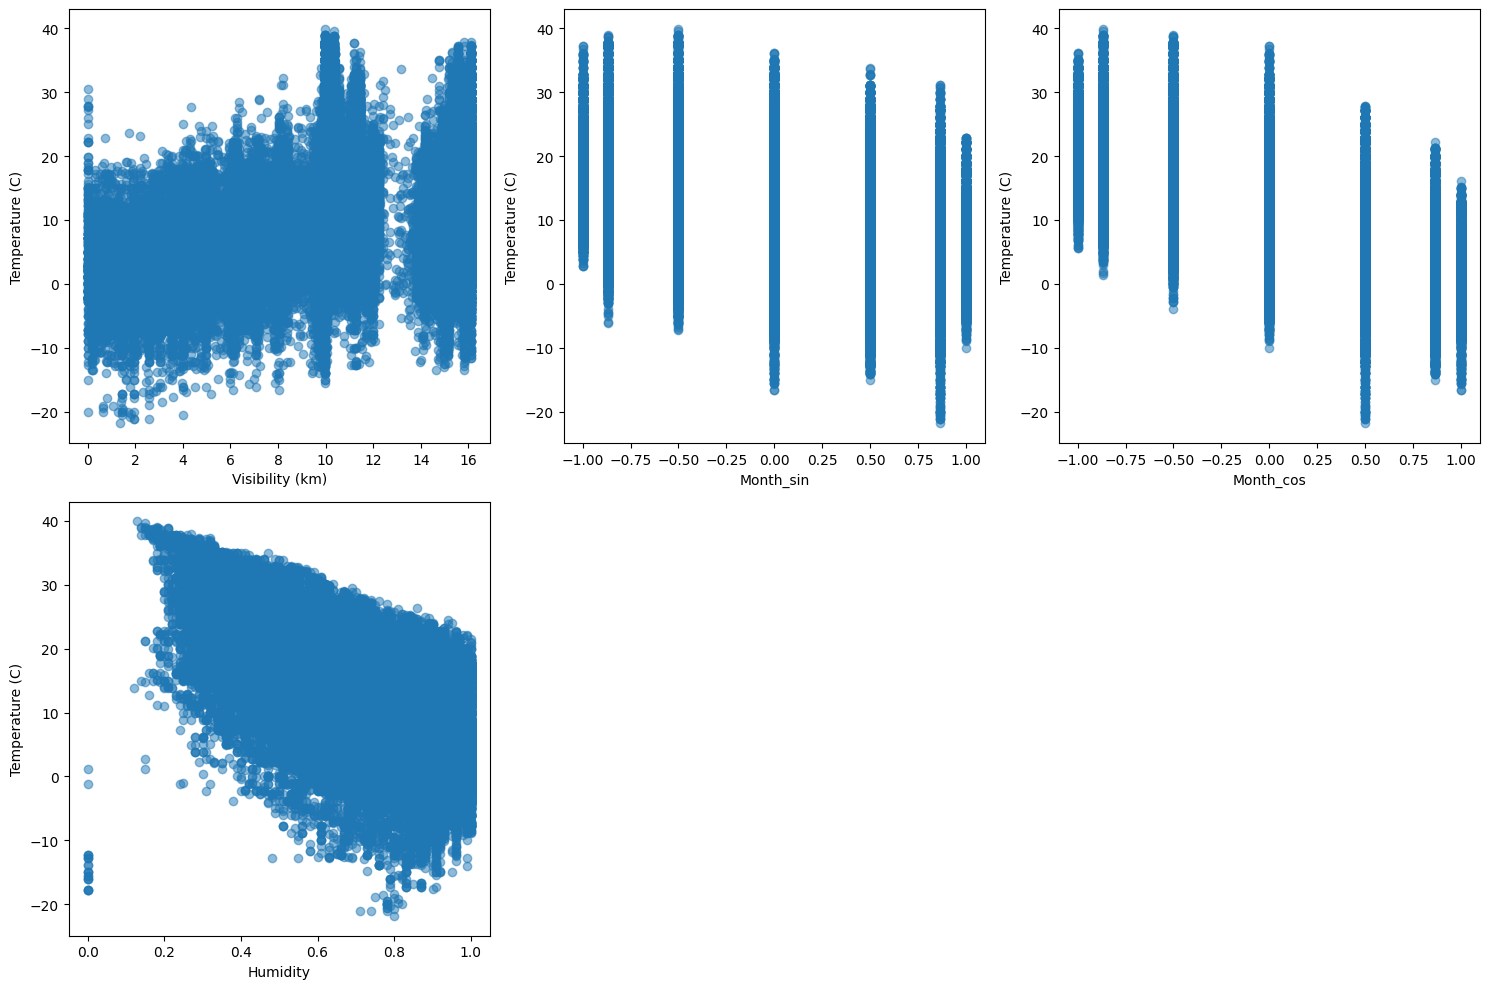

Training MSE: 17.49
Test MSE: 17.96
Training R²: 0.809
Test R²: 0.803
                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 8.143e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:05:01   Log-Likelihood:            -2.1870e+05
No. Observations:               76748   AIC:                         4.374e+05
Df Residuals:                   76743   BIC:                         4.375e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

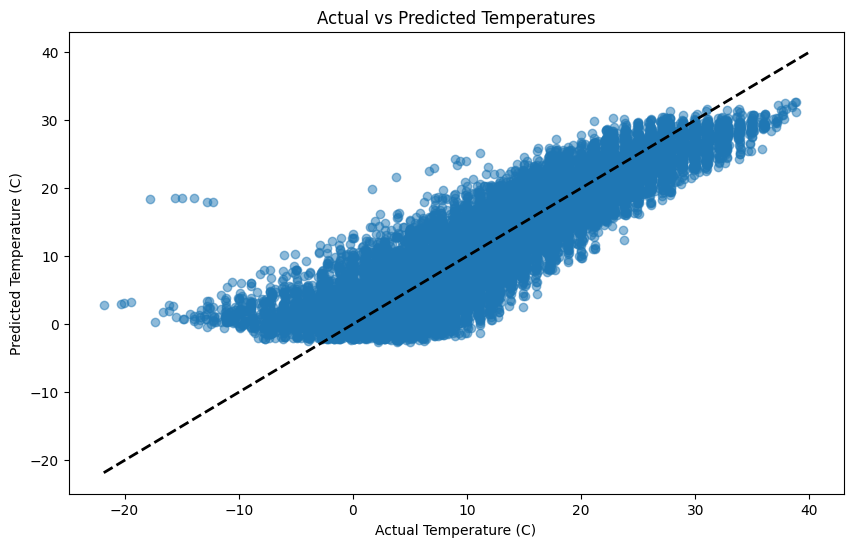

In [ ]:
numerical_features = ['Visibility (km)','Month_sin', 'Month_cos', 'Humidity']
X = df[numerical_features]
y = df['Temperature (C)']

# Visualize relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R²: {train_r2:.3f}')
print(f'Test R²: {test_r2:.3f}')

# Statistical summary
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperatures')
plt.show()

# Model Choice: Using the Exhaustive reasearch method, the best model is the model from Trial 4 with the following characterstics:
Training MSE: 17.49

Test MSE: 17.96

Training R²: 0.809

Test R²: 0.803

# It is significantly better than the other models with the exception of Trial 2, where the values are extremely close, but this model is slightly better.

# **Final Decision: Choose the model with all features: Humidity, Visibility and Month**

**Chosen Model: Y= 26 - 0.0568Visibilty - 19.55Humidity - 5.21sin(Month) -
 7.72cos(Month)**

**Model Testing:**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define dependent (y) and independent variables (X)
numerical_features = ['Visibility (km)','Month_sin', 'Month_cos', 'Humidity']
X = df[numerical_features]
y = df['Temperature (C)']


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Model Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Performance:\nMAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")



Linear Regression Performance:
MAE: 3.326, MSE: 17.965, RMSE: 4.238, R²: 0.803


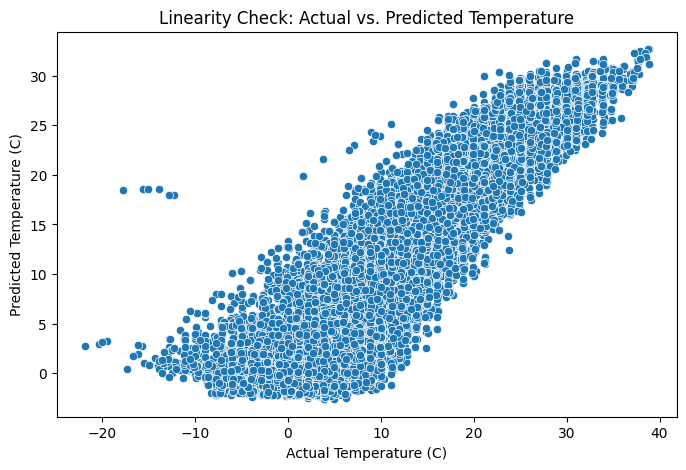

In [ ]:
# Assumption Testing
## 1. Linearity Check
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Linearity Check: Actual vs. Predicted Temperature")
plt.show()


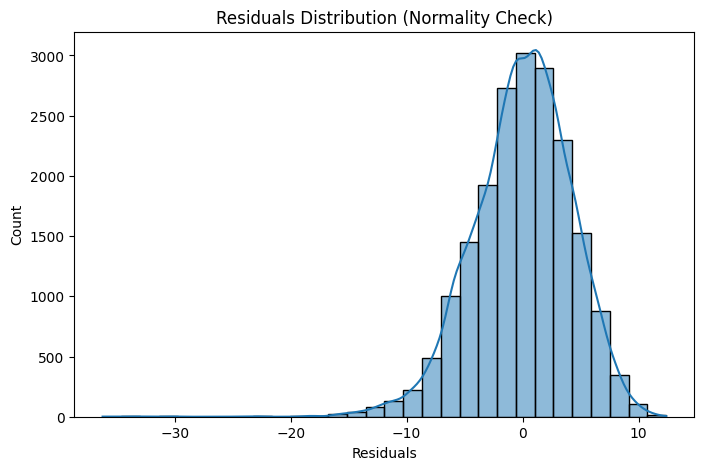

Shapiro-Wilk Test: Statistic=0.985, p-value=0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19188.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:

## 2. Normality of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Normality Check)")
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

Breusch-Pagan Test p-value: 0.000 (p < 0.05 indicates heteroscedasticity)


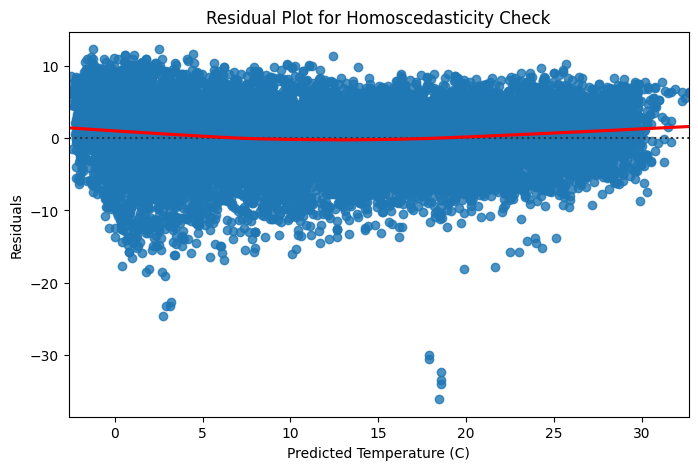

In [ ]:
## 3. Homoscedasticity Check (Breusch-Pagan Test)
_, pval, _, _ = het_breuschpagan(residuals, sm.add_constant(X_test))
print(f"Breusch-Pagan Test p-value: {pval:.3f} (p < 0.05 indicates heteroscedasticity)")

# Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Temperature (C)")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity Check")
plt.show()


In [ ]:

## 4. Autocorrelation Check (Durbin-Watson Test)
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.3f} (Values near 2 indicate no autocorrelation)")


Durbin-Watson Statistic: 1.982 (Values near 2 indicate no autocorrelation)


In [ ]:
# Multiple Linear Regression Model using Statsmodels
X_train_sm = sm.add_constant(X_train)
mlr_model = sm.OLS(y_train, X_train_sm).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 8.143e+04
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:26:59   Log-Likelihood:            -2.1870e+05
No. Observations:               76748   AIC:                         4.374e+05
Df Residuals:                   76743   BIC:                         4.375e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.8616      0.086    3